In [3]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(210, 320)


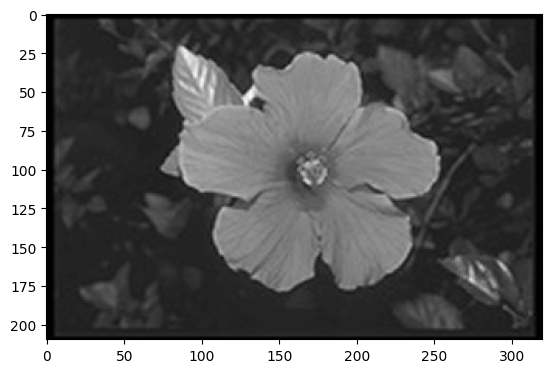

In [7]:
img = cv2.imread('/content/gdrive/MyDrive/디영처/flower.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gImg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gImg1.shape)
plt.imshow(gImg1, cmap='gray')

In [8]:
gOutImg = np.zeros((gImg1.shape[0], gImg1.shape[1]))

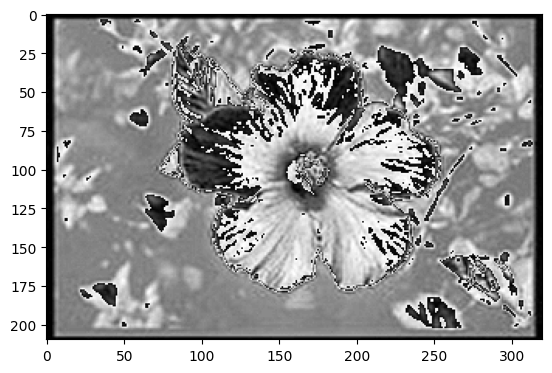

In [9]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    val = gImg1[h,w] % 64
    val = val * 4
    gOutImg[h,w] = val

plt.imshow(gOutImg, cmap = 'gray')
#cv2_imshow(gOutImg)

In [10]:
equalVal = 200
widht = 5

min = equalVal - widht
max = equalVal + widht

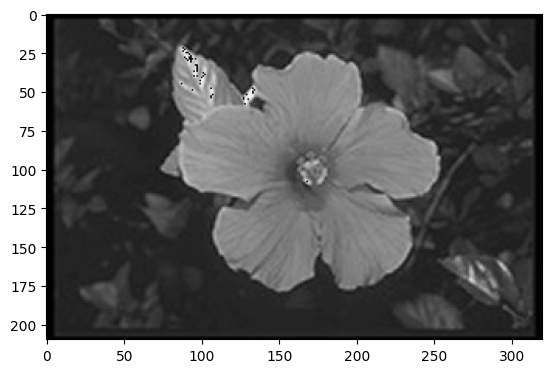

In [11]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    if(gImg1[h,w] > min and gImg1[h,w] < max):
      gOutImg[h,w] = 0
    else:
      gOutImg[h,w] = gImg1[h,w]

plt.imshow(gOutImg, cmap = 'gray')
#cv2_imshow(gOutImg)

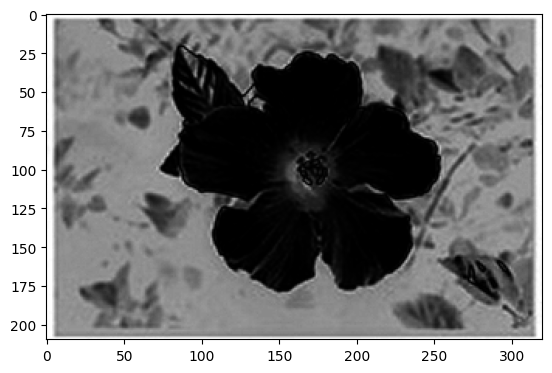

In [12]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    val = 255*(gImg1[h,w]/128 -1)*(gImg1[h,w]/128 -1)
    gOutImg[h,w] = val

plt.imshow(gOutImg, cmap = 'gray')
#cv2_imshow(gOutImg)

In [13]:
planeNumber = 1
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue * 2

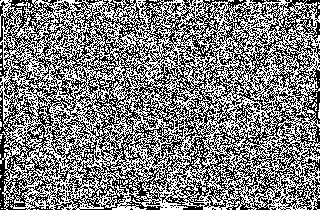

In [14]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imVal = (int)(gImg1[h,w] / planeValue)
    if(imVal % 2 == 0):
      gOutImg[h,w] = 0
    else:
      gOutImg[h,w] = 255

#plt.imshow(gOutImg, cmap = 'gray')
cv2_imshow(gOutImg)

(306, 538)


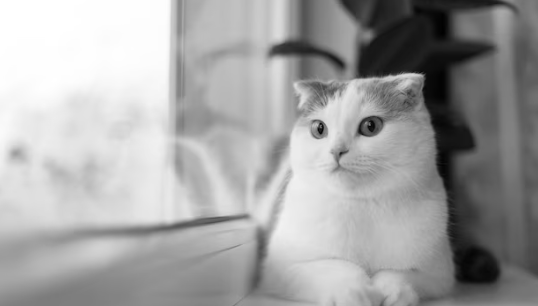

In [16]:
img = cv2.imread('/content/gdrive/MyDrive/디영처/고양이 사진.PNG')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gImg2.shape)
cv2_imshow(gImg2)

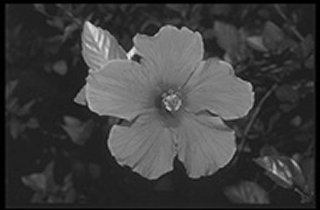

In [18]:
gWaterMarker = gImg1.copy()

for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imVal = gImg2[h,w]
    if(imVal > 128):
      if(gImg1[h,w] % 2 == 0):
        gWaterMarker[h,w] += 1
    else:
      if(gImg1[h,w] % 2 == 1):
        gWaterMarker[h,w] -= 1

cv2_imshow(gWaterMarker)

In [19]:
planeNumber = 1
planeValue = 1
for i in range(planeNumber-1):
  planevalue = planeValue * 2

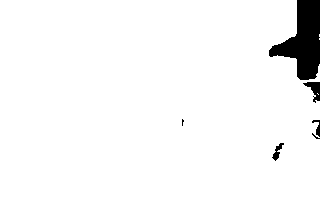

In [20]:
for h in range(0, gWaterMarker.shape[0]):
  for w in range(0, gWaterMarker.shape[1]):
    imVal = (int)(gWaterMarker[h,w] / planeValue)
    if(imVal % 2 == 0):
      gOutImg[h,w] = 0
    else:
      gOutImg[h,w] = 255

cv2_imshow(gOutImg)